![alt text](Enunciado.png)

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]

Autovalores com defeito λ (omega²):
[0.00000e+00 1.00000e-03 3.90000e-03 9.20000e-03 1.58000e-02 2.54000e-02
 3.54000e-02 4.97000e-02 6.29000e-02 8.19000e-02 9.80000e-02 1.22000e-01
 1.40800e-01 1.69600e-01 1.90900e-01 2.24600e-01 2.48300e-01 2.86800e-01
 3.12800e-01 3.55900e-01 3.84100e-01 4.31600e-01 4.62000e-01 5.13600e-01
 5.46200e-01 6.01600e-01 6.36300e-01 6.95100e-01 7.32100e-01 7.93800e-01
 8.33200e-01 8.97300e-01 9.39100e-01 1.00520e+00 1.04950e+00 1.11710e+00
 1.16390e+00 1.23240e+00 1.28180e+00 1.35080e+00 1.40280e+00 1.47180e+00
 1.52630e+00 1.59490e+00 1.65190e+00 1.71960e+00 1.77900e+00 1.84540e+00
 1.90710e+00 1.97180e+00 2.03570e+00 2.09840e+00 2.16420e+00 2.22460e+00
 2.29210e+00 2.34980e+00 2.41890e+00 2.47370e+00 2.54400e+00 2.59570e+00
 2.66690e+00 2.71540e+00 2.78710e+00 2.83

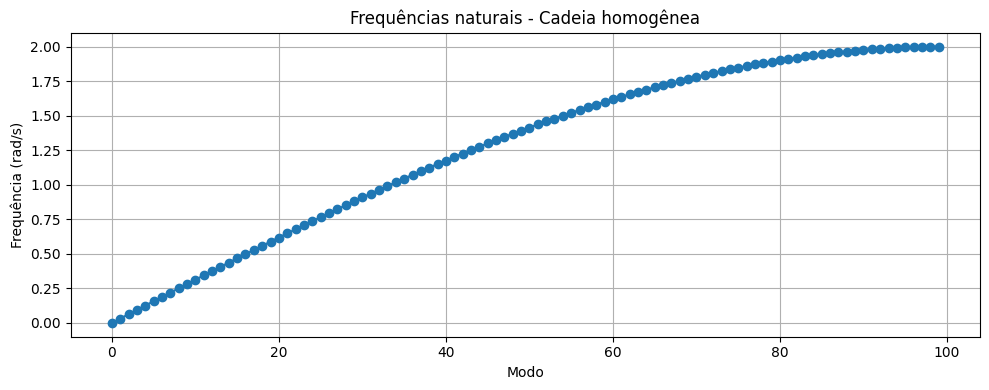

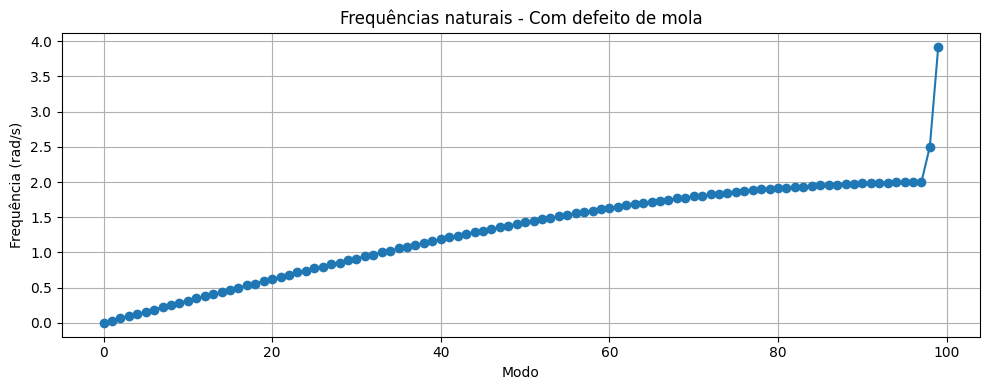

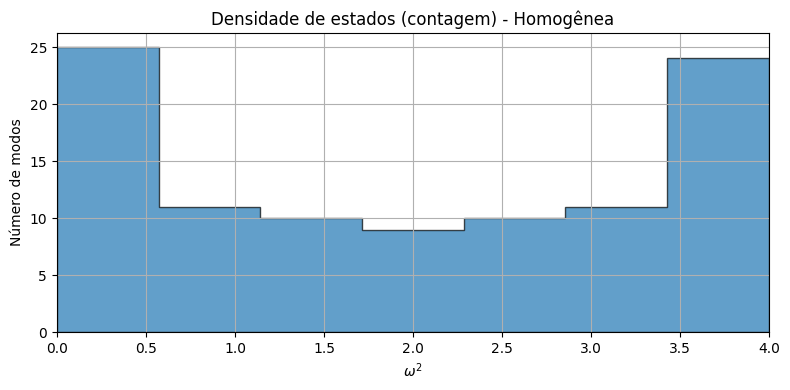

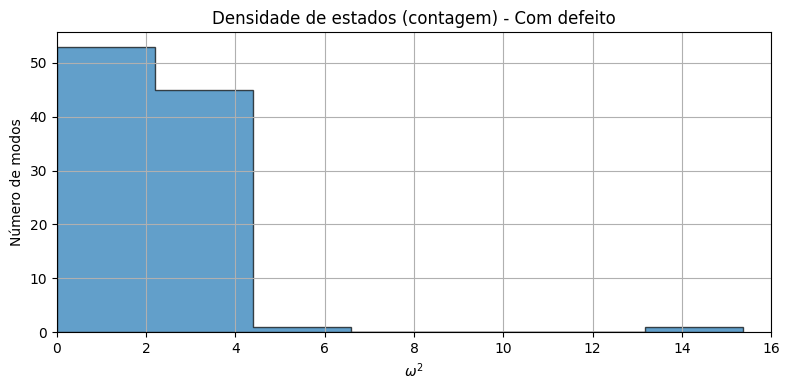

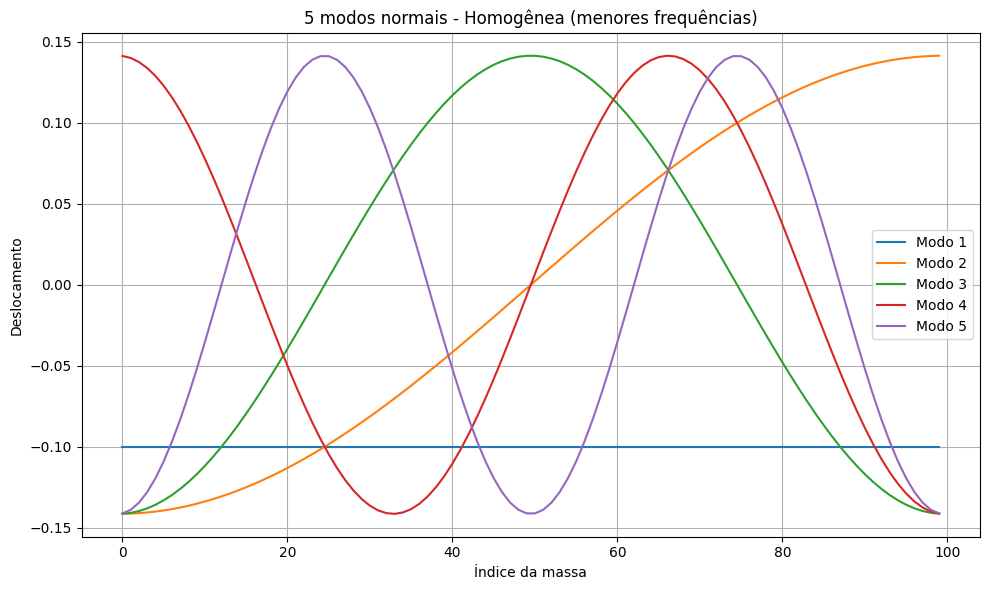

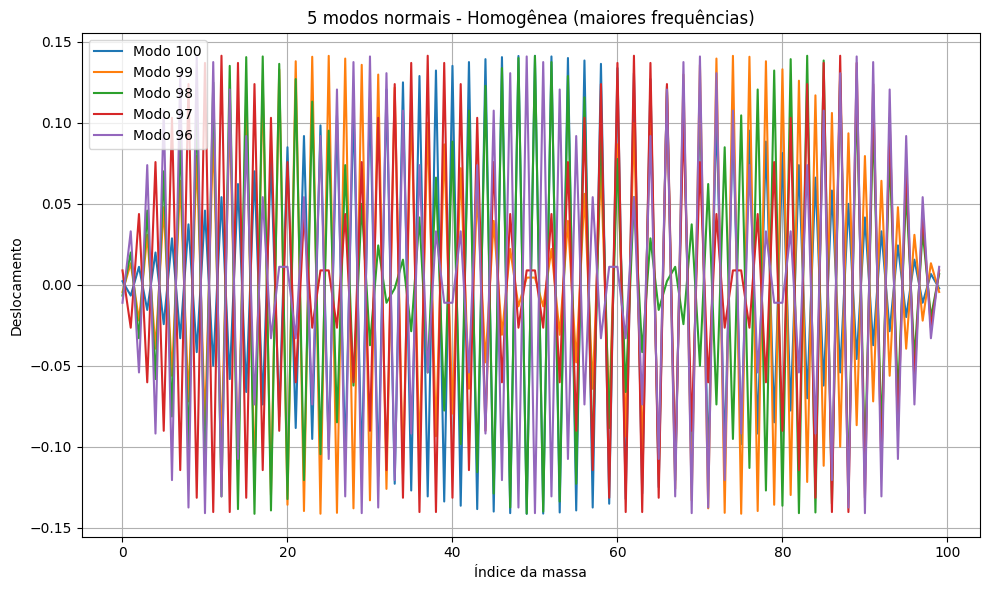

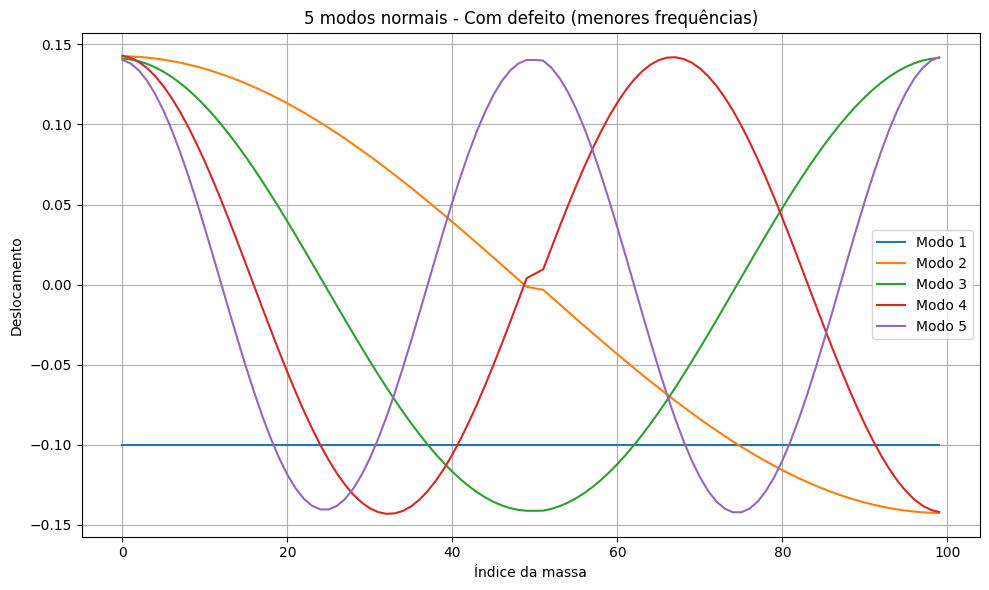

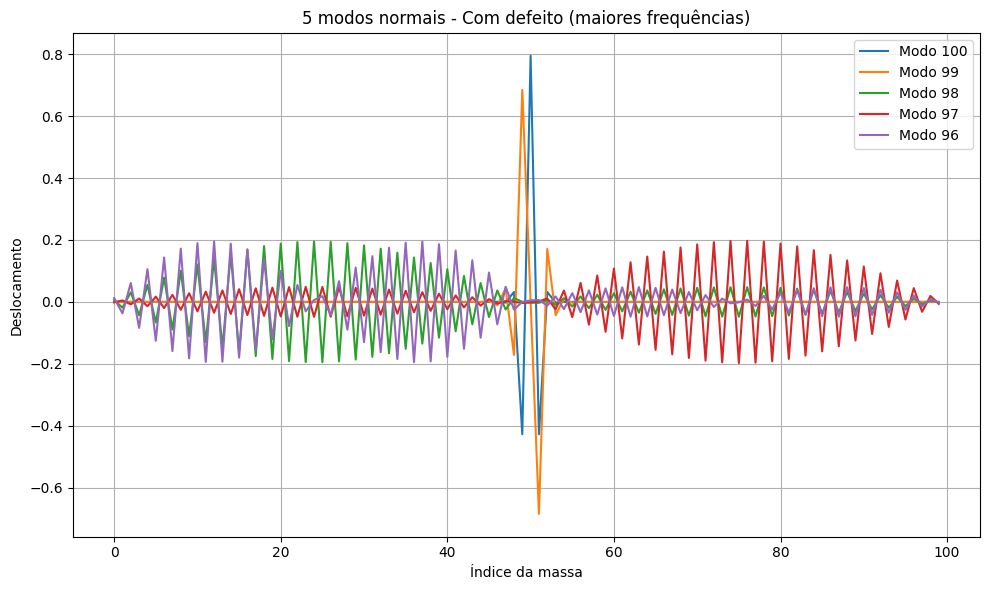

In [2]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Parâmetros
N = 100
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)
print(D_h)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])

print("\nAutovalores com defeito λ (omega²):")
print(np.round(eigvals_d[idx_d], 4))

print("\nAutovetor com defeito:")
print(np.round(eigvecs_d, 4))  

# ---------- PLOTS DE FREQUÊNCIA ----------
plt.figure(figsize=(10, 4))
plt.plot(frequencias_h, 'o-', label='Homogênea')
plt.title('Frequências naturais - Cadeia homogênea')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(frequencias_d, 'o-', label='Com defeito')
plt.title('Frequências naturais - Com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(8, 4))
plt.hist(eigvals_h[idx_h], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Homogênea')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 4)  
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(eigvals_d[idx_d], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Com defeito')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 16)  
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS ----------
# Homogênea - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_h[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Homogênea (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Homogênea - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_h[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Homogênea (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_d[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Com defeito (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_d[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Com defeito (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]

Autovalores com defeito λ (omega²):
[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e-04 2.00000e-04 2.00000e-04
 4.00000e-04 5.00000e-04 6.00000e-04 8.00000e-04 1.00000e-03 1.20000e-03
 1.40000e-03 1.70000e-03 1.90000e-03 2.20000e-03 2.50000e-03 2.90000e-03
 3.20000e-03 3.60000e-03 3.90000e-03 4.40000e-03 4.80000e-03 5.20000e-03
 5.70000e-03 6.20000e-03 6.70000e-03 7.20000e-03 7.70000e-03 8.30000e-03
 8.90000e-03 9.50000e-03 1.01000e-02 1.08000e-02 1.14000e-02 1.21000e-02
 1.28000e-02 1.35000e-02 1.42000e-02 1.50000e-02 1.58000e-02 1.66000e-02
 1.74000e-02 1.83000e-02 1.91000e-02 2.00000e-02 2.08000e-02 2.18000e-02
 2.27000e-02 2.37000e-02 2.46000e-02 2.57000e-02 2.66000e-02 2.77000e-02
 2.87000e-02 2.99000e-02 3.09000e-02 3.21000e-02 3.31000e-02 3.44000e-02
 3.54000e-02 3.67000e-02 3.78000e-02 3.92

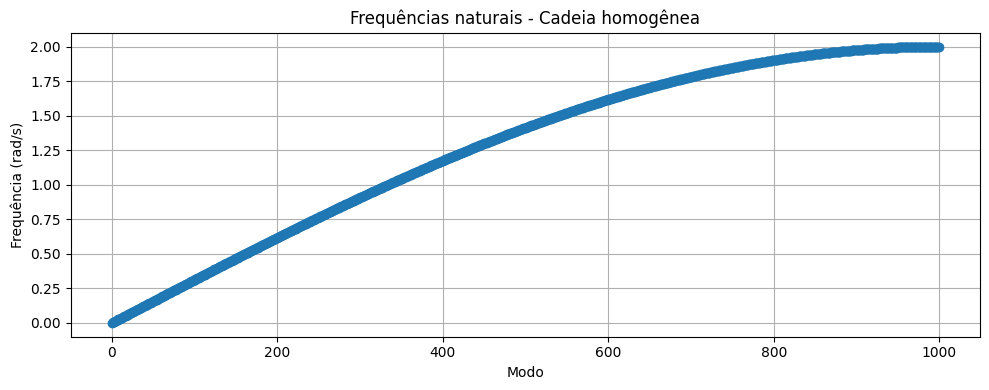

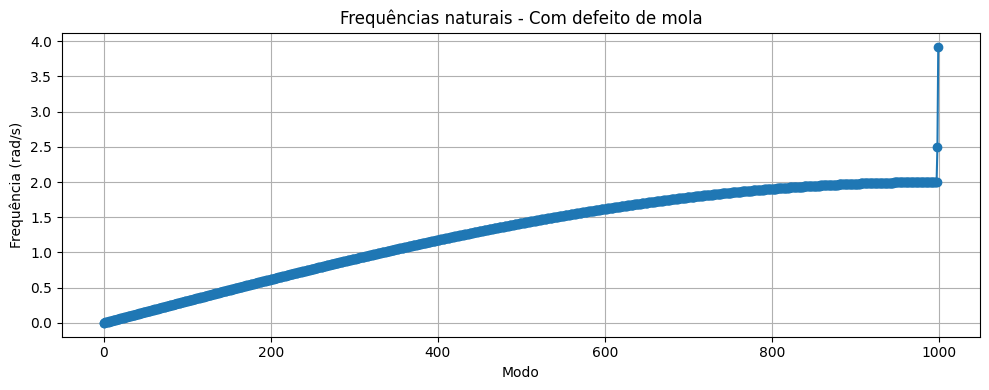

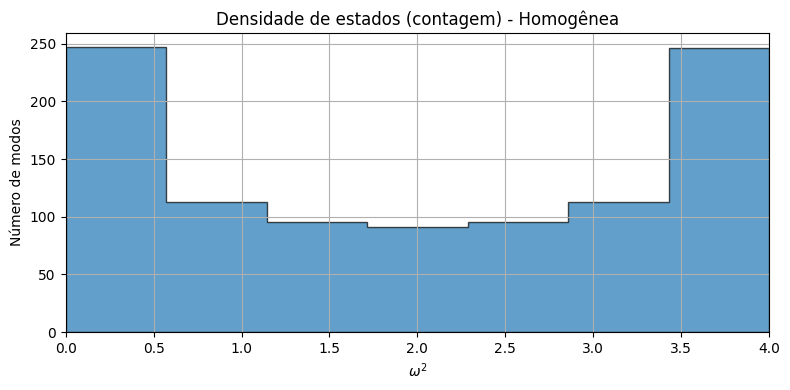

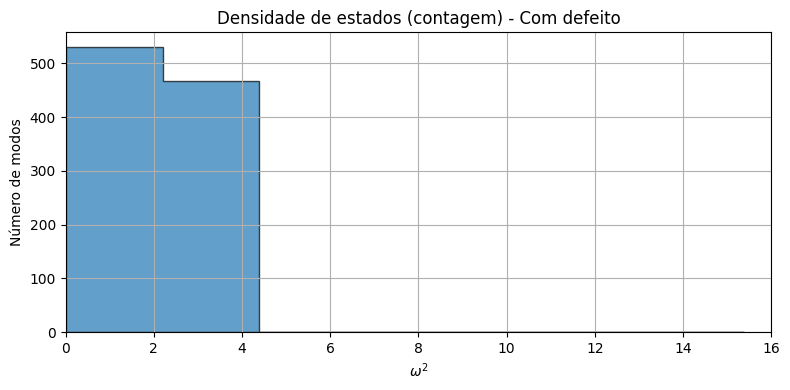

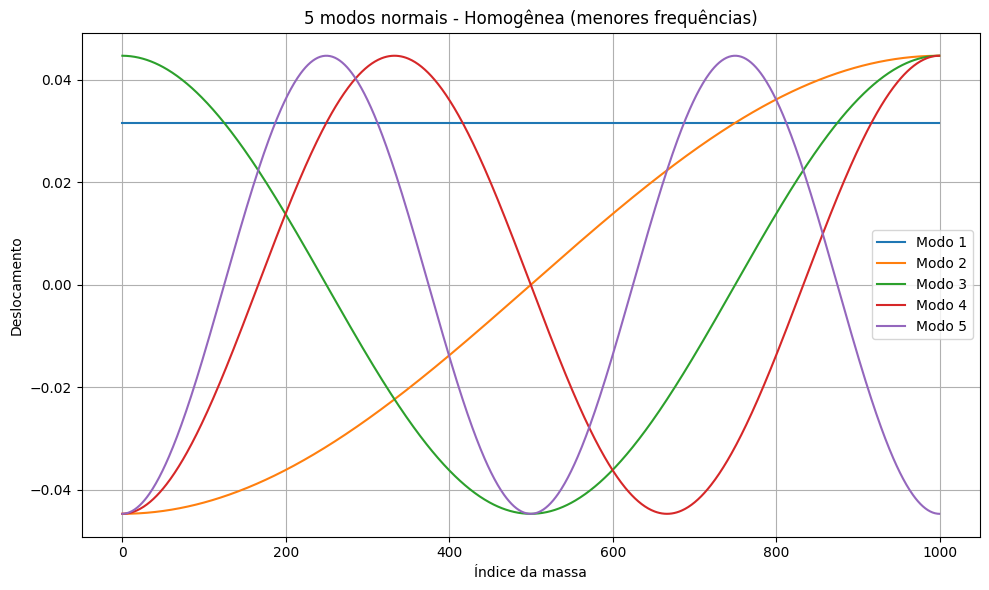

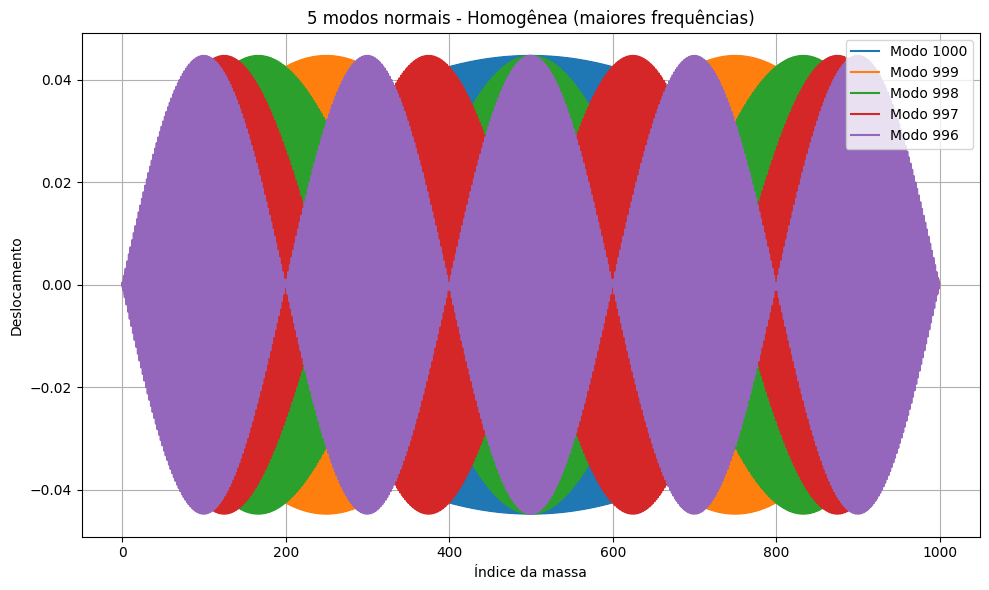

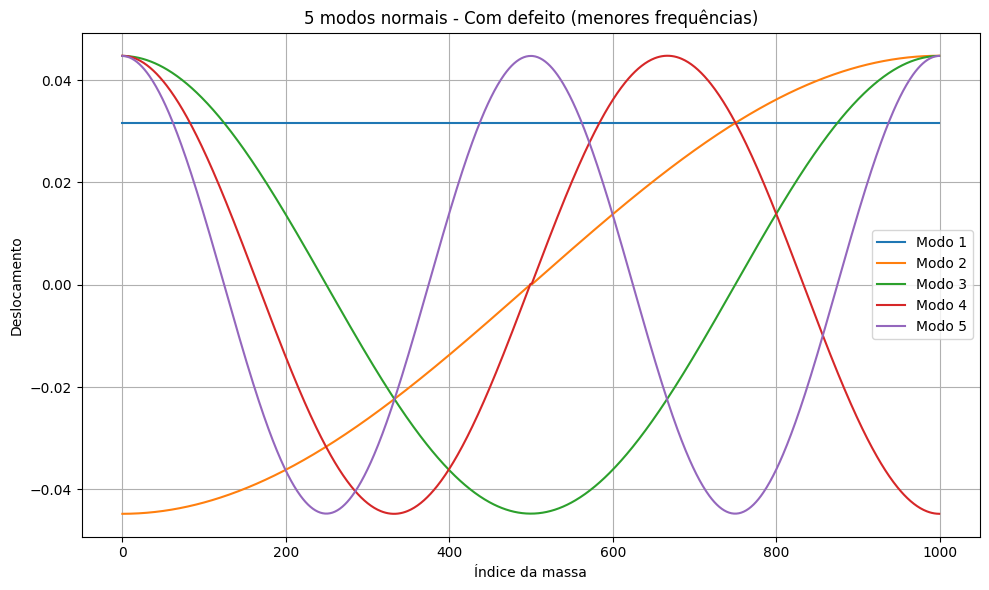

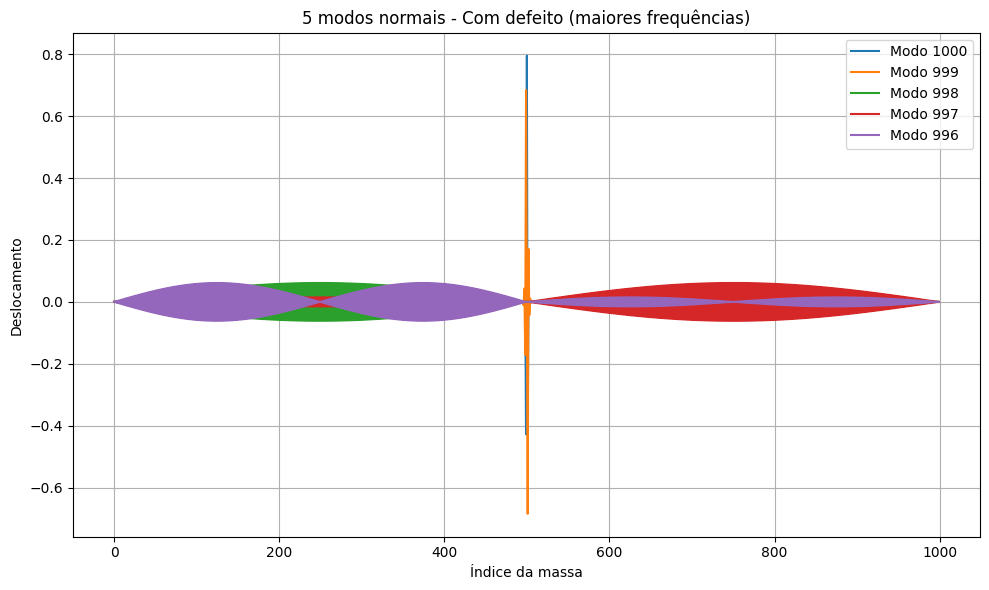

In [3]:
# Parâmetros
N = 1000
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)
print(D_h)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])

print("\nAutovalores com defeito λ (omega²):")
print(np.round(eigvals_d[idx_d], 4))

print("\nAutovetor com defeito:")
print(np.round(eigvecs_d, 4))  

# ---------- PLOTS DE FREQUÊNCIA ----------
plt.figure(figsize=(10, 4))
plt.plot(frequencias_h, 'o-', label='Homogênea')
plt.title('Frequências naturais - Cadeia homogênea')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(frequencias_d, 'o-', label='Com defeito')
plt.title('Frequências naturais - Com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(8, 4))
plt.hist(eigvals_h[idx_h], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Homogênea')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 4)  
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(eigvals_d[idx_d], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Com defeito')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 16)  
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS ----------
# Homogênea - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_h[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Homogênea (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Homogênea - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_h[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Homogênea (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_d[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Com defeito (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_d[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Com defeito (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]

Autovalores com defeito λ (omega²):
[ 0.      0.      0.     ...  4.      6.25   15.3759]

Autovetor com defeito:
[[ 0.01   -0.0141 -0.0141 ... -0.      0.     -0.    ]
 [ 0.01   -0.0141 -0.0141 ...  0.     -0.      0.    ]
 [ 0.01   -0.0141 -0.0141 ... -0.      0.      0.    ]
 ...
 [ 0.01    0.0141 -0.0141 ...  0.      0.      0.    ]
 [ 0.01    0.0141 -0.0141 ... -0.      0.      0.    ]
 [ 0.01    0.0141 -0.0141 ...  0.      0.      0.    ]]


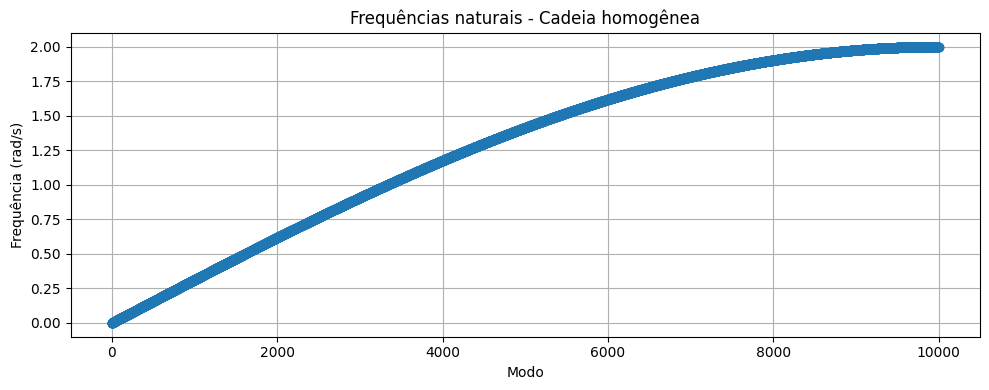

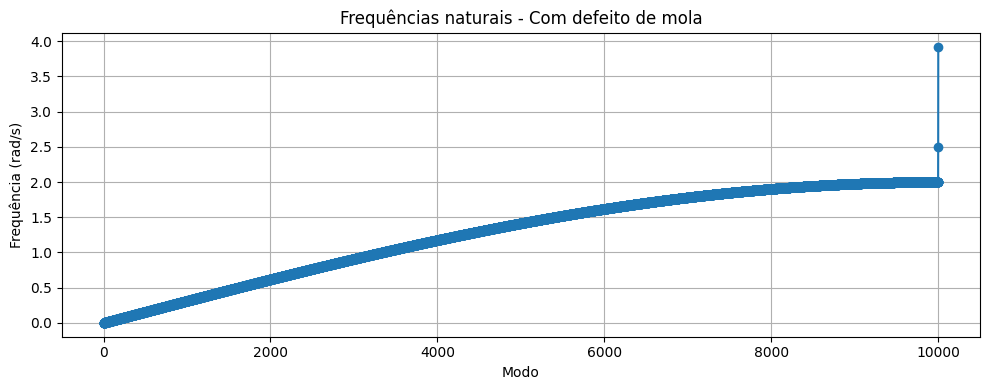

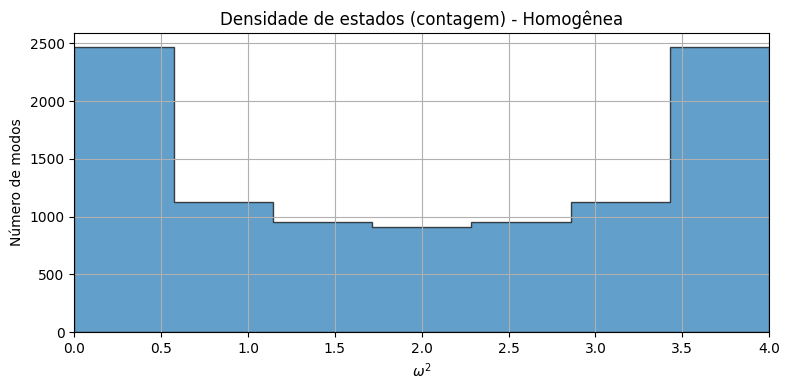

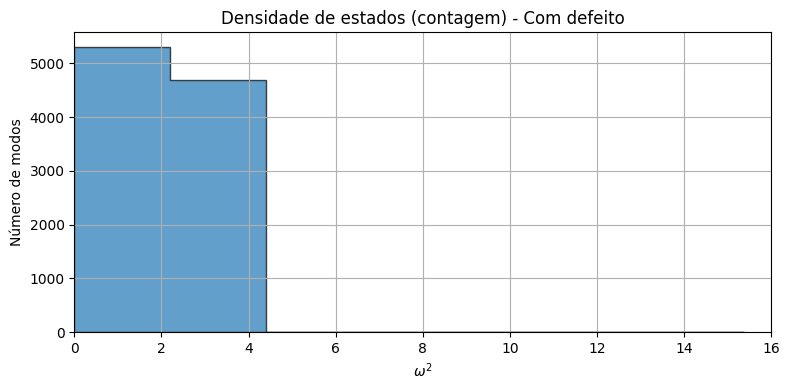

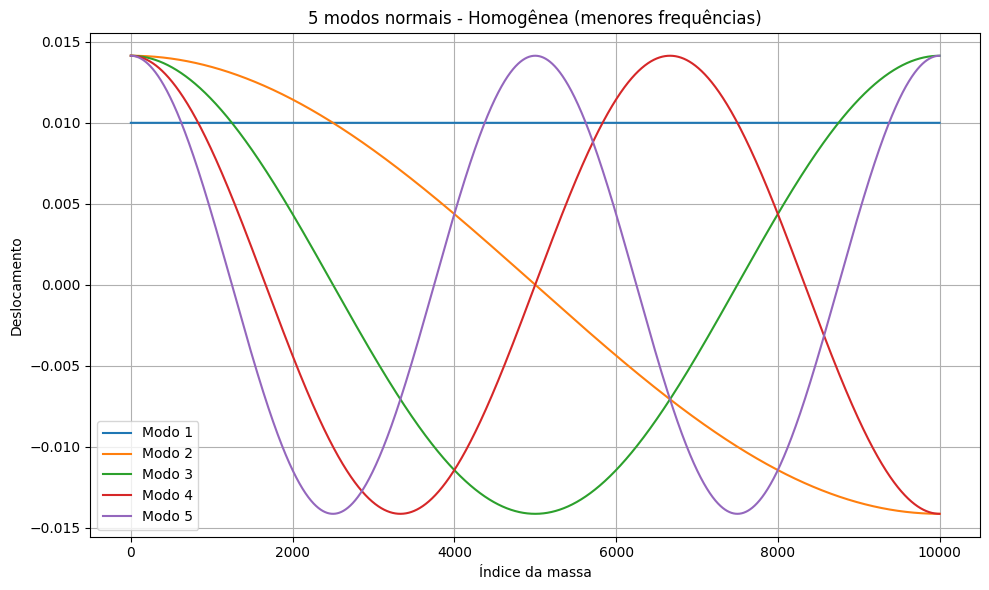

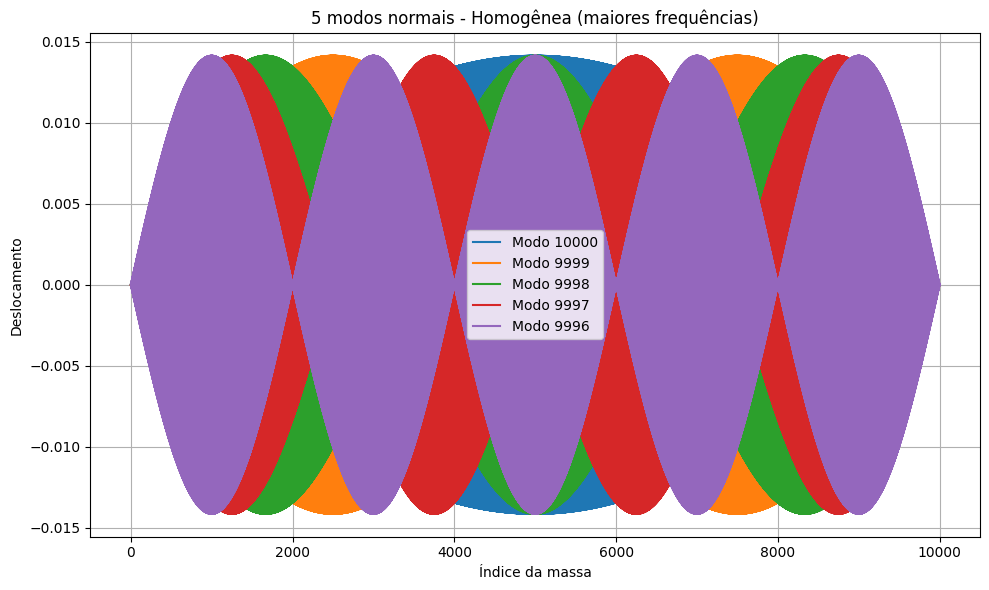

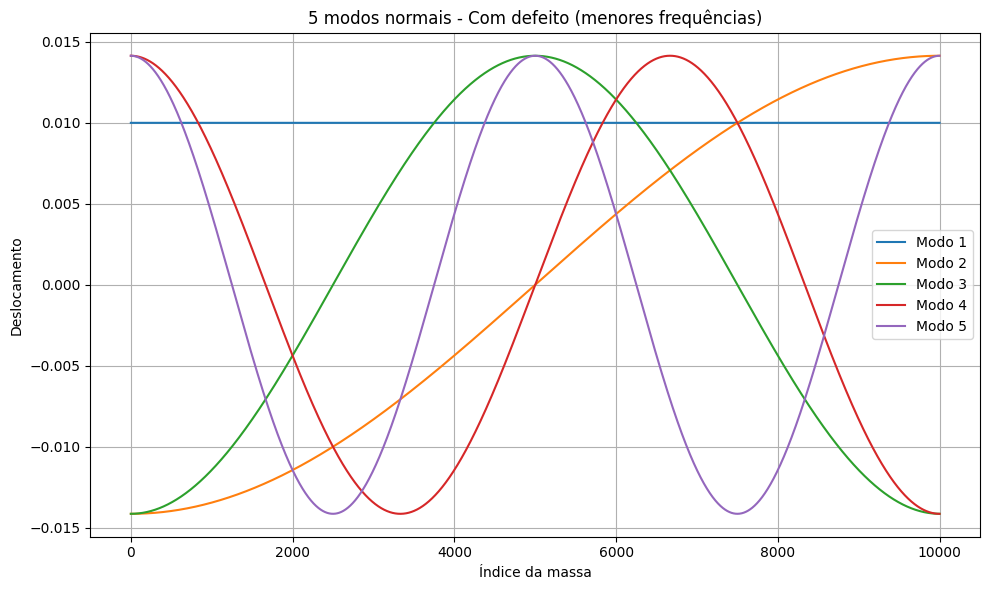

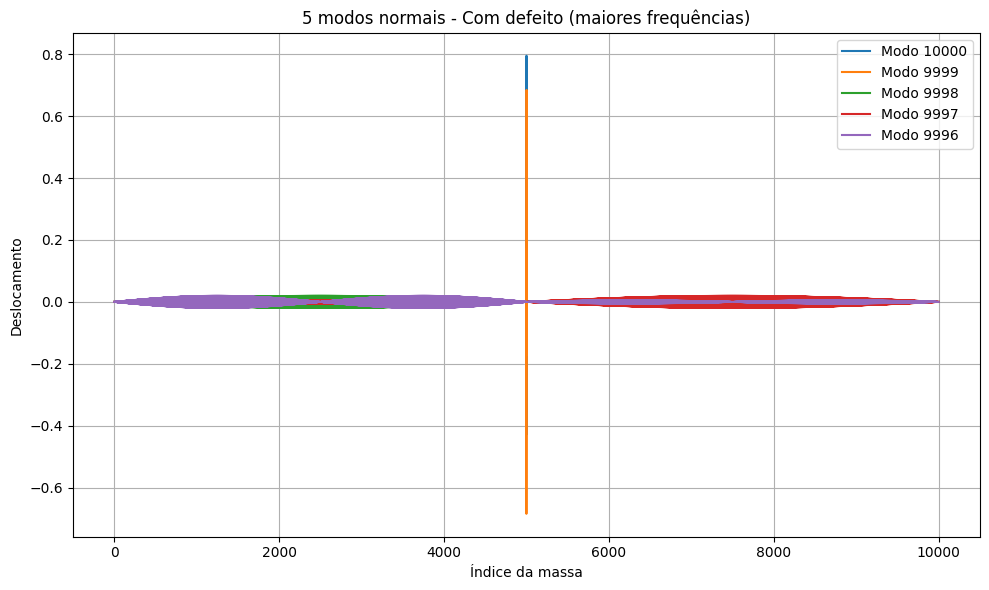

In [4]:
# Parâmetros
N = 10000
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)
print(D_h)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])


# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])

print("\nAutovalores com defeito λ (omega²):")
print(np.round(eigvals_d[idx_d], 4))

print("\nAutovetor com defeito:")
print(np.round(eigvecs_d, 4))  

# ---------- PLOTS DE FREQUÊNCIA ----------
plt.figure(figsize=(10, 4))
plt.plot(frequencias_h, 'o-', label='Homogênea')
plt.title('Frequências naturais - Cadeia homogênea')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(frequencias_d, 'o-', label='Com defeito')
plt.title('Frequências naturais - Com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(8, 4))
plt.hist(eigvals_h[idx_h], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Homogênea')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 4)  
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(eigvals_d[idx_d], bins=7, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (contagem) - Com defeito')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Número de modos')
plt.xlim(0, 16)  
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS ----------
# Homogênea - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_h[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Homogênea (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Homogênea - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_h[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Homogênea (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_d[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Com defeito (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_d[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Com defeito (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()